In [85]:
import numpy as np
from matplotlib import pyplot as plt
import copy

#Generates 2D Data, classified 3 ways
datapoints = 3000

#separating functions
def f(x, y):
    return x**2 - y
    
def g(x, y):
    return (x- 0.9)**2 + (y - 0.9)**2 - 0.1

data = []
for i in range(datapoints):
    data.append([])
    data[i].append(np.random.uniform(0, 1))
    data[i].append(np.random.uniform(0, 1))
    x = data[i][0]; y = data[i][1]
    if f(x, y) > 0:
        data[i].append(np.array([[1, 0, 0]]).T)
    elif g(x, y) > 0:
        data[i].append(np.array([[0, 1, 0]]).T)
    else:
        data[i].append(np.array([[0, 0, 1]]).T)

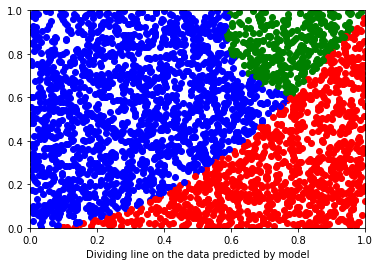

In [86]:
#a plot of the data
fig = plt.figure()
ax = fig.add_subplot(111)
u = np.linspace(0, 1, 100)
x, y = np.meshgrid(u, u)

for i in range(len(data)):
    if np.all(data[i][2] == np.array([[1, 0, 0]]).T):
        colour = 'r'
    elif np.all(data[i][2] == np.array([[0, 1, 0]]).T):
        colour = 'b'
    else:
        colour = 'g'
    plt.scatter(data[i][0], data[i][1], color = colour)

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])

plt.xlabel('Dividing line on the data predicted by model')
plt.show()

In [87]:
#learning parameters
learningrate = 0.05
number_epochs = 5
test_proportion = 0.8

#separates test data from training data
train_data = data[0:int(test_proportion * len(data))]
test_data = data[int(test_proportion * len(data)):len(data)]

#the neural network class - very similar to my other neural network notebook
class neural_network(object):
    def __init__(self):
        self.weights_first_layer = np.random.normal(size = (10, 2))
        self.biases_first_layer = np.random.normal(size = (10, 1))

        self.weights_second_layer = np.random.normal(size = (10, 10))
        self.biases_second_layer = np.random.normal(size = (10, 1))

        self.weights_third_layer = np.random.normal(size = (10, 10))
        self.biases_third_layer = np.random.normal(size = (10, 1))

        self.weights_fourth_layer = np.random.normal(size = (3, 10))
        self.biases_fourth_layer = np.random.normal(size = (3, 1))
        
    #calculates a z from an [x, y] vector based on current weights and biases of the network
    def calculate(self, x):
        l1 = np.matmul(self.weights_first_layer, x) + self.biases_first_layer
        l1 = np.tanh(l1)
        l2 = np.matmul(self.weights_second_layer, l1) + self.biases_second_layer
        l2 = np.tanh(l2)
        l3 = np.matmul(self.weights_third_layer, l2) + self.biases_third_layer
        l3 = np.tanh(l3)
        l4 = np.matmul(self.weights_fourth_layer, l3) + self.biases_fourth_layer
        l4 = np.tanh(l4)
        
        arg = np.argmax(l4)
        prediction = np.array([[0, 0, 0]])
        prediction[0][arg] = 1
        prediction = prediction.T
        
        return l1, l2, l3, l4, prediction
    
    #the learning algorithm, performs backpropagation on the data and updates the weights/biases
    def learn(self, data):
        for epoch in range(number_epochs):
            loss = 0
            for point in data:
                pt = np.array([[point[0], point[1]]]).T
                l1, l2, l3, l4, l5 = self.calculate(pt)
                y = point[2]
                error = np.linalg.norm(l4 - y)**2

                final_delta = 2*(l4 - y)*(1 - l4**2)           

                delta_3 = (np.array([np.ones(len(l3))]).T - l3**2) * np.matmul(self.weights_fourth_layer.T, final_delta)
                delta_2 = (np.array([np.ones(len(l2))]).T - l2**2) * np.matmul(self.weights_third_layer.T, delta_3)
                delta_1 = (np.array([np.ones(len(l1))]).T - l1**2) * np.matmul(self.weights_second_layer.T, delta_2)

                self.weights_first_layer -= learningrate * np.matmul(delta_1, pt.T)
                self.weights_second_layer -= learningrate * np.matmul(delta_2, l1.T)
                self.weights_third_layer -= learningrate * np.matmul(delta_3, l2.T)
                self.weights_fourth_layer -= learningrate * np.matmul(final_delta, l3.T)
                
                self.biases_first_layer -= learningrate * delta_1
                self.biases_second_layer -= learningrate * delta_2
                self.biases_third_layer -= learningrate * delta_3
                self.biases_fourth_layer -= learningrate * final_delta[0]
                                
                loss += error
            print("EPOCH LOSS: ", loss)
            
    #a function for testing on a set of test data, which returns mean squared error
    def test(self, data):
        percenterror = 0
        for point in data:
            pt = np.array([[point[0], point[1]]]).T
            l1, l2, l3, l4, l5 = self.calculate(pt)
            y = point[2]
            if np.all(y == l5):
                pass
            else:
                percenterror += 1
        percenterror = percenterror/len(data)
        return percenterror * 100

In [88]:
network = neural_network()

In [89]:
network.learn(train_data)

EPOCH LOSS:  902.4156809243691
EPOCH LOSS:  494.601367876059
EPOCH LOSS:  412.41571462312953
EPOCH LOSS:  374.9785844368676
EPOCH LOSS:  343.9270789473636


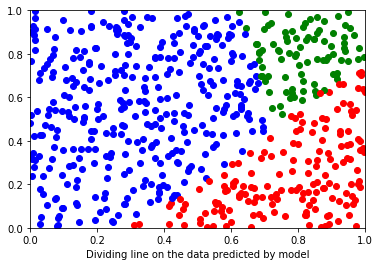

In [90]:
#a plot of the test data - not bad
predictions = []
for point in test_data:
    pt = np.array([[point[0], point[1]]]).T
    prediction = network.calculate(pt)[-1]
    predictions.append(prediction)
    
xs = test_data[:][0]
ys = test_data[:][1]

fig = plt.figure()
ax = fig.add_subplot(111)
u = np.linspace(0, 1, 100)
x, y = np.meshgrid(u, u)

for i in range(len(predictions)):
    if np.all(predictions[i] == np.array([[1, 0, 0]]).T):
        colour = 'r'
    elif np.all(predictions[i] == np.array([[0, 1, 0]]).T):
        colour = 'b'
    else:
        colour = 'g'
    plt.scatter(test_data[i][0], test_data[i][1], color = colour)

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])

plt.xlabel('Dividing line on the data predicted by model')
plt.show()

In [91]:
#percentage error on test data
percenterror = network.test(test_data)
print("TEST PERCENT ERROR: ", percenterror)

TEST PERCENT ERROR:  9.166666666666666
